# Final Step (Checking final situation of data via graphs)

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid") 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150 
pd.options.display.max_columns = 100
import json
import regex as re
from datetime import date
from datetime import datetime
from datetime import timedelta

C:\Users\gundo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("clean_scout_emrePART3.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,Sedans
price,14640,14500,16790,15090,16422,14480,16700,17990,18500,17990
vat,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,83450.000,73000.000,16200.000,63668.000,62111.000,14986.000,57000.000,16103.000,11300.000,26415.000
Type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used
Body Color,Black,Brown,Black,White,White,Red,Grey,White,Black,Silver
Paint Type,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Uni/basic
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic
Cylinders,4.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,4.000


In [5]:
df.shape

(12168, 32)

# VISUALIZING THE CORRELATION WITH A HEATMAP

In [6]:
df.corr()

,price,km,Cylinders,Gears,Previous_Owners,hp_kW,Nr_of_Doors,Nr_of_Seats,Displacement_cc,Weight_kg,cons_comb,cons_city,cons_country,CO2_Emission
price,1.000,-0.387,-0.071,0.554,NaN,0.674,0.121,0.227,0.208,0.447,0.168,0.074,0.258,0.231
km,-0.387,1.000,0.221,-0.048,NaN,0.024,0.045,-0.008,0.324,0.142,-0.350,-0.310,-0.370,-0.247
Cylinders,-0.071,0.221,1.000,0.055,NaN,0.251,0.003,0.201,0.620,0.258,0.136,0.130,0.131,0.301
Gears,0.554,-0.048,0.055,1.000,NaN,0.428,0.084,0.082,0.245,0.313,-0.083,-0.135,-0.026,-0.026
Previous_Owners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp_kW,0.674,0.024,0.251,0.428,NaN,1.000,0.103,0.277,0.536,0.642,0.253,0.215,0.283,0.400
Nr_of_Doors,0.121,0.045,0.003,0.084,NaN,0.103,1.000,0.062,0.059,0.121,-0.112,-0.126,-0.091,-0.087
Nr_of_Seats,0.227,-0.008,0.201,0.082,NaN,0.277,0.062,1.000,0.174,0.306,0.187,0.140,0.229,0.257
Displacement_cc,0.208,0.324,0.620,0.245,NaN,0.536,0.059,0.174,1.000,0.500,-0.100,-0.118,-0.078,0.180
Weight_kg,0.447,0.142,0.258,0.313,NaN,0.642,0.121,0.306,0.500,1.000,0.020,-0.034,0.074,0.214


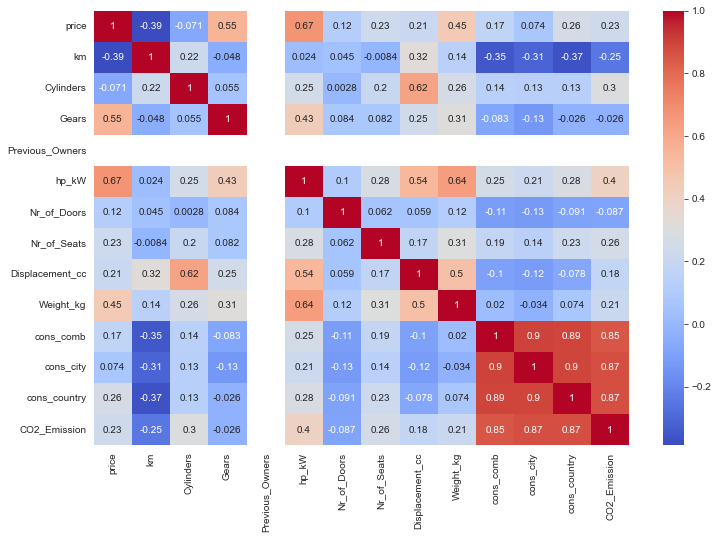

In [8]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot = True, cmap = "coolwarm");

In [11]:
df_corr = df.corr()[["price"]].sort_values(by="price", ascending=False)

<AxesSubplot:>

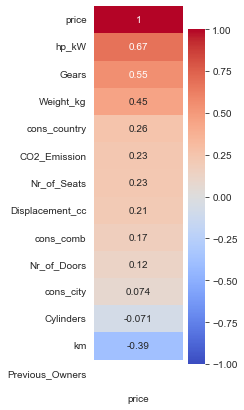

In [12]:
plt.figure(figsize=(2, 7))

sns.heatmap(df_corr, annot= True, cmap="coolwarm", vmin = -1, vmax=1)

# Distribution of cylinder and hp kW according to carbon emissions

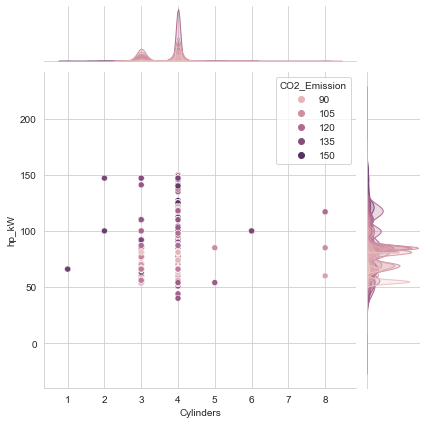

In [13]:
sns.jointplot(x="Cylinders", y="hp_kW", data=df, hue="CO2_Emission") # kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

# Export dataframe to csv file (without dummy)

In [15]:
df.to_csv("final_scout_not_dummy.csv", index=False)